# Predicting Car Crash Severity in the United States
### Analysis Completed by Vaibhav Sanjay and Kashish Patel

# Part 1: Introduction

## Background
Car crashes are one of the largest causes of fatalities in the United States. Analysis of car accidents is useful for locating accident-prone regions, analyzing effects of weather, and predicting accidents. We analyze a countrywide dataset of car accidents to understand patterns in car crashes and predict the severity of them based on various parameters such as location, precipitation, time, and various other factors.

We used the [US Accidents (2016-2021)](https://smoosavi.org/datasets/us_accidents) dataset on [Kaggle](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents) for our analysis [[1]](#1). The dataset includes 2.8 million points of accident data from February 2016 to December 2021 and covers 49 states. The data was originally collected using US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

## Motivation
This is a tutorial on how to use data science strategies and libraries to analyze large data sets with Python. Some of the topics we will be discussing are
- Cleaning and organizing data with Pandas
- Creating visualizations on maps
- Plotting variables in bar charts, violin plots, and other graphical visualizations
- Normalizing and encoding data for machine learning
- Training and scoring machine learning models

By the end of this tutorial you should be able to apply these techniques to your own datasets.

# Part 2: Data Wrangling
Our first task will be to unpack the accidents dataset and see what we are working with.

## Imports
This notebook depends on [pandas](https://pandas.pydata.org/docs/), [matplotlib](https://matplotlib.org/stable/index.html), [plotly](https://plotly.com/python/), [colour](https://pypi.org/project/colour/), [statistics](https://docs.python.org/3/library/statistics.html), [seaborn](https://seaborn.pydata.org/), and [sklearn](https://scikit-learn.org/stable/)

Throughout this notebook, we will provide specific documentation links for more unique uses of the above libraries. For other cases, please refer to the library documentation links above.

In [2]:
# Run this if plotly, colour, or seaborn aren't installed
%pip install plotly
%pip install colour
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams as plt_params
from matplotlib.pyplot import figure
import plotly.express as px
from statistics import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
import plotly.io as pio
import seaborn as sns
from colour import Color
pio.renderers.default = 'iframe'

## Reading in the Data & Initial Steps
We start by reading in the data from our downloaded CSV file into a [Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). While writing this project, we worked with the first 100 rows of the CSV file since the original file has over 2.8 million entries by using the "nrows" argument in the read_csv() function. We recommend doing the same when following this tutorial, since reading in every row may result in lag and long processing times. 

In [5]:
# data = pd.read_csv('./US_Accidents_Dec21_updated.csv', nrows=5000)
data = pd.read_csv('./US_Accidents_Dec21_updated.csv')

First, let's take a look at the columns we have to get familiar with how our data is structured.

In [10]:
print(list(data.columns))

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


So each accident has its own ID as well as some important contextual information such as a start time, end time, location, and weather information. If you want to learn more about each column, you can view the descriptions [here](https://smoosavi.org/datasets/us_accidents).

Now, let's take at the actual data in our DataFrame.

In [11]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Initial Filtering

We can see that some of these columns are not important/relevant to our analysis. Here is a list of these columns and explanations of why we don't need them:

- **Description** - Too messy and does not provide much information that isn't available in the other columns.

- **Number**, **Street**, **Side**, **City**, **County**, **Zipcode**, **Timezone**, and **Airport_Code** - All provide location information that is not as specific as latitude and longitude. Also, there are not enough instances of car accidents in the same city, zipcode, street, etc to build a machine learning model that depends on them. We do keep the **State** column since there are enough accidents in each state to build a model on them.
- **Country** - Irrelevant, as this dataset only concerns the US.
- **End_Lat**, **End_Lng**, and **Distance** - Since we already have the start latitude and longitudes, these features are not too important. Also, we are trying to build a model that predict the severity of an accident before it happens, and of course we don't know these values until after it happens.
- **Weather timestamp** - Shows the timestamp that weather data is collected. This is not very significant.
- **Sunrise_Sunset**, **Civil_Twilight**, **Nautical_Twilight** and **Astronomical_Twilight** - Different measure for when sunset occurs. This does not seem very important, and we will use the time in favor of this.
- **ID** - We don't need individual identification of accidents

In [12]:
# list of all features we are removing right now
to_remove = ["Description", "Number", "Street", "Side", "City", "County", "Zipcode", 
    "Timezone", "Airport_Code", "Country", "End_Lat", "End_Lng", "Distance", "Weather_Timestamp", "Sunrise_Sunset", 
    "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "ID"]

# remove the necessary columns
data = data.drop(to_remove, axis=1, errors='ignore')

# Part 3: Data Exploration
Now we are ready to analyze our data. We have several methods for analyzing this data set, most of which analyze the relationship between the severity of accidents and the other variables (columns).

## Styling Plots
This function uses [colour](https://pypi.org/project/colour/) to style the colors of our plots with a gradient later on. This makes our plots look a little nicer.

In [31]:
# this function takes a list, and option "low" color, "high" color, and "middle" color
# and generates a list of colors ranging from low->middle->high, with higher values in the input
# list corresponding to colors closer to "high", and lower values corresponding to "low"
def gen_colors(lst, low="yellow", high="darkorange", middle=None):
    # create the gradient of colors
    gradient = list(Color(low).range_to(high, len(lst)))

    # reorganize the gradient list to match elements in the input list
    srted = sorted(lst)
    colors = []
    for item in lst:
        colors.append(gradient[srted.index(item)])
    return [color.hex for color in colors]

plt_params['figure.dpi'] = 75
plt_params['figure.figsize'] = (15, 6)

## Graphing Accident Locations
We are given the state acronyms for every accident with the "State" column. Using this data, we create a [chloropleth plot with plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html) for the frequency of car accidents across the United States, grouped by state.

Note: If you are viewing this in VSCode, there is currently a bug that makes the next two plots invisible. If you would like to see this image, please click [here](https://drive.google.com/file/d/1Ozzu66ZEwdt-WfYxWER1vZwlBB3OAuCm/view?usp=sharing), or you can run this in a Jupyter Notebook. You can also use the "write_image" function with the path that you want to download the image to.

In [16]:
# Plotly wants a dataframe but the value_counts method gives a series
# Gather the frequencies of car accidents for each state into a DataFrame",
freqs = data['State'].value_counts().rename_axis('State').reset_index(name='Accidents')

# create the map
fig = px.choropleth(
    freqs,
    locations='State',
    color='Accidents',
    locationmode='USA-states',
    color_continuous_scale='blues',
    title='Frequency of Car Accidents in the US (2016-2021)',
    scope='usa'
)

fig.show()

# uncomment this next line to save the image
# fig.write_image('./state_frequencies.jpg')

The above map shows which states have the highest frequencies of car accidents, with darker shades of blue indicating higher frequencies and lighter shades indicating a lower frequency.

We can see that states like California and Florida have the highest frequency of car accidents, according to our dataset. But, we have to consider different factors that may cause this. First and foremost, these states have high population relative to the other states, so that may play a large role in their high frequencies of car accidents. Second, these states may just be better at reporting accidents than other states, so even if other states had much more accidents, they may just go unreported.

As a result of this, we will now look at the average severity of car accidents in each state. This will tell us which states have, on average, the most severe car accidents and will minimize any bias towards certain states that comes from doing a simple frequency map.

To take the average of each individual state, we can take advantage of [Pandas groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Again, if you are in VSCode and would like to view the plot, please click [here](https://drive.google.com/file/d/10hKz5uubUzAd_8NySNzbewy90mN9aKFr/view?usp=sharing), or open this notebook using Jupyter, or save the image by uncommenting the last line.

In [17]:
# Average the severity of the accidents of car accidents for each state
severity = pd.DataFrame(data.groupby(by='State').apply(lambda x: x['Severity'].mean())).reset_index()
severity.columns = ['State', 'Severity']

# Create the figure
fig = px.choropleth(
        severity,
        locations='State',
        color='Severity',
        locationmode='USA-states',
        color_continuous_scale='reds',
        title='Severity of Car Accidents in the US by State (2016-2021)',
        scope='usa'
)

fig.show()

# uncomment this next line to save the image
# fig.write_image('./state_severities.jpg')

This is notably different from the previous map. We can see that while Wisconsin may have notably few accidents they typically have more severe accidents as compared to other states. Furthermore, midwestern states such as Wyoming and Colorado also have high severity accidents, while states near the borders seems to have less severe accidents.

## Graphing Accident Times
Now that we have determined where the more severe accidents may occur, we would like to know when they happen. It seems pretty intuitive that the more severe accidents would happen when most people are on the road, which may depend on the day of the week. By finding this information, we can learn to be more cautious when most car accidents occur.

In order to perform this analysis, we will take advantage of our data's **Start_Time** column.

### Accidents on Days of the Week
The matplotlib library is useful for making several kinds of plots. We will make a [violin plot](https://matplotlib.org/stable/gallery/statistics/violinplot.html) using matplotlib that displays each day of the week as a separate violin, each as a mini-time series showing when accidents occur most frequently. To do this, we will need to group the data by the day of week first, then collect the hours of each observation for each of these groups.

In [6]:
# turn the start times into actual datetimes
data['Start_Time'] = pd.to_datetime(data['Start_Time'], infer_datetime_format=True)

# add two new series to our DataFrame that represent the day of week and hour of the car accidents
data['Day'] = data['Start_Time'].apply(lambda x: x.dayofweek)
data['Hour'] = data['Start_Time'].apply(lambda x: x.hour)

# create a list of lists with each inner list representing a different day of the week that contains the hours that an accident occurs
grouped_by_day = data.groupby(by='Day')
hour_foreach_day = grouped_by_day.apply(lambda x: x['Hour'].tolist()).tolist()

Now that we have grouped our data, we will create the violin plots for each day of the week. We also want to show when the "mode" occurs for each day of the week. This is the time when the most accidents happen. We add a small line for each mode by [customizing the violin plot](https://matplotlib.org/stable/gallery/statistics/customized_violin.html).

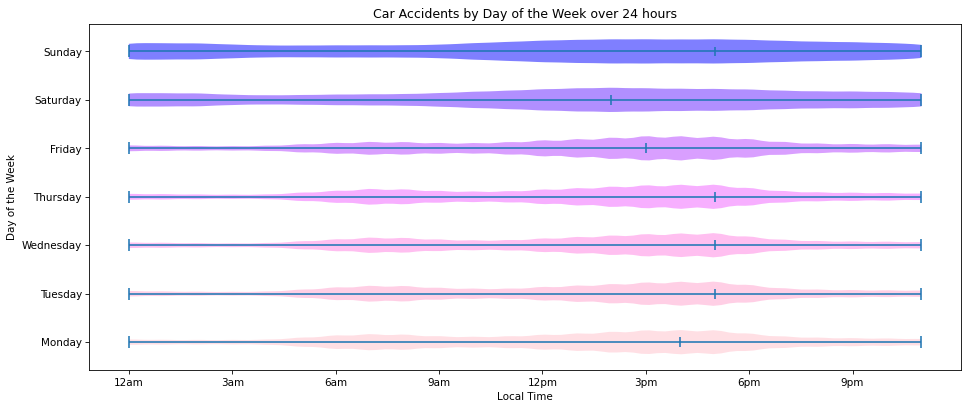

In [20]:
# create the violin plot
fig, ax = plt.subplots()
violins = ax.violinplot(dataset=hour_foreach_day, positions=range(len(hour_foreach_day)), vert=False)

# add lines marking the mode for each day, representing the time where most accidents happen
bodies = violins['bodies']
modes = [mode(x) for x in hour_foreach_day]
ax.vlines(modes, list(map(lambda x: x-0.1, range(len(bodies)))), list(map(lambda x: x+0.1, range(len(bodies)))))

# add colors to help differentiate each violin
colors = gen_colors(range(len(bodies)), "pink", "blue")
for i in range(len(bodies)):
    bodies[i].set_facecolor(colors[i])
    bodies[i].set_alpha(0.5)

# add labels to plot
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Car Accidents by Day of the Week over 24 hours")
plt.xlabel("Local Time")
plt.ylabel("Day of the Week")
plt.xticks(ticks=[0, 3, 6, 9, 12, 15, 18, 21], labels=["12am", "3am", "6am", "9am", "12pm", "3pm", "6pm", "9pm"])
plt.show()

This graph makes sense if we take some prior assumptions into account. On the weekdays we can see humps at around 7-8am and again around 4pm. On the weekends we see more humps at midday and in the afternoon. This coincides with times when people usually go to work, leave work, and go out on weekends. During these times there are likely to be more cars on the road, leading to more accidents.

Again, we should look at not just the frequencies. The actual severities of the accidents at the busier times may not actually be that high, so we should look at the average severities of the accidencts at every day-hour combination.

To do this, we will create a heatmap using seaborn that will help visualize when the severities of car accidents are high using color.

Some helpful documentation for this process can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

[Text(0.5, 1.0, 'Average Severities of Car Accidents at Different Time of the Week')]

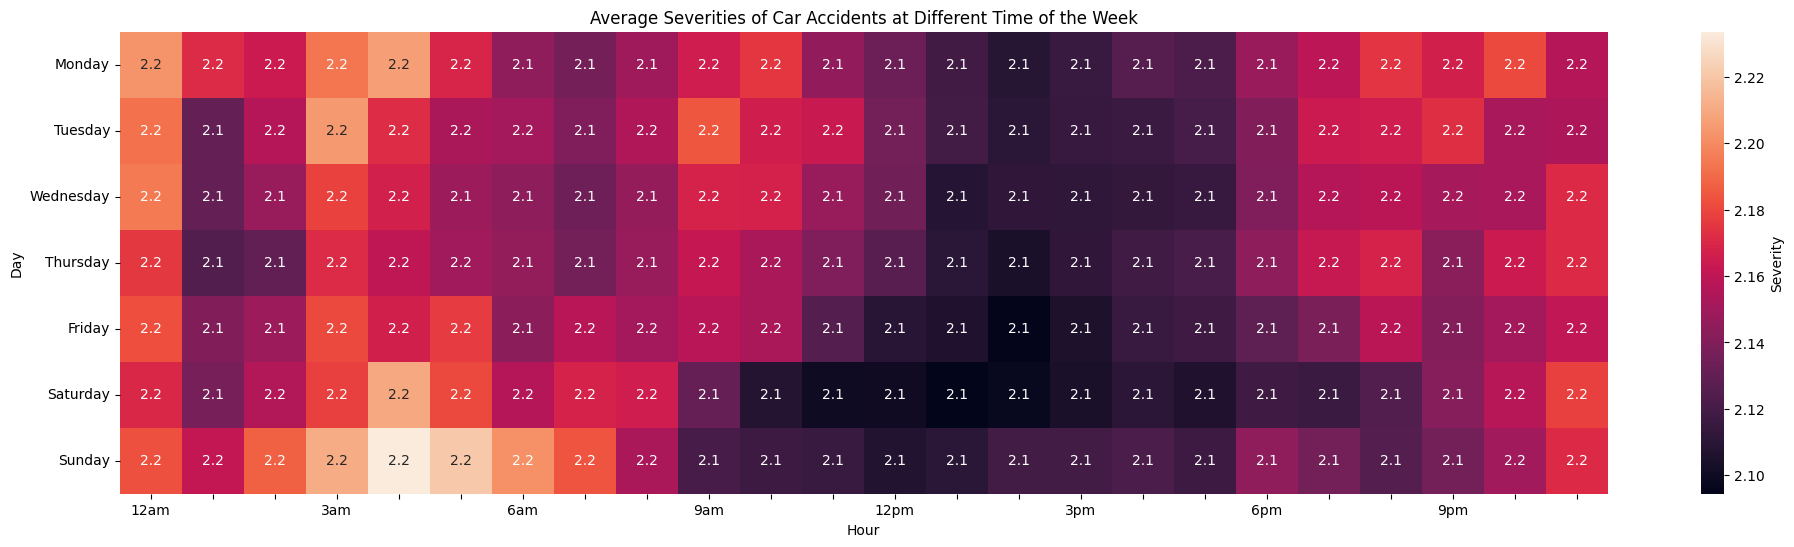

In [29]:
# first, we create a pivot table with the Day and Hour on the x and y axis, mapping to the average severities
severities_by_dayhour = data.pivot_table(index="Day", columns="Hour", values="Severity")

# create the plot
fig, ax = plt.subplots(figsize=(24, 6))

# these lists help with the labeling of our plot
xlabels = ["12am", "", "", "3am", "", "", "6am", "", "", "9am", "", "", "12pm", "", "", "3pm", "", "", "6pm", "", "", "9pm", "", ""]
ylabels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# use seaborn's heatmap function
sns.heatmap(severities_by_dayhour, cbar_kws={'label': 'Severity'}, annot=True, square=False, xticklabels=xlabels, yticklabels=ylabels, ax=ax).set(title="Average Severities of Car Accidents at Different Time of the Week")

We can see that with the lighter shades, there are, on average, more severe accidents, and the darker shades indicate less severe accidents.  From this plot, we can see that the most severe accidents happen before 9am and after 5pm, which makes sense since most people are parked at work between 9am and 5pm. On weekends, the severity of car accidents seems to be more evenly distributed, which also makes sense since people aren't at work and go out throughout the day.

### Accidents Over the Past Few Years
We can look at the times that accidents happen more generally. Let's consider the average severity of accidents over the entire timespan. We take the average accident severity for each year of collected data from 2016-2021. This way, we can see if there is a general trend where accidents have become more or less severe in the past couple years.

Again, we can take advantage of groupbys to group the accidents by year, and then find the average severity.

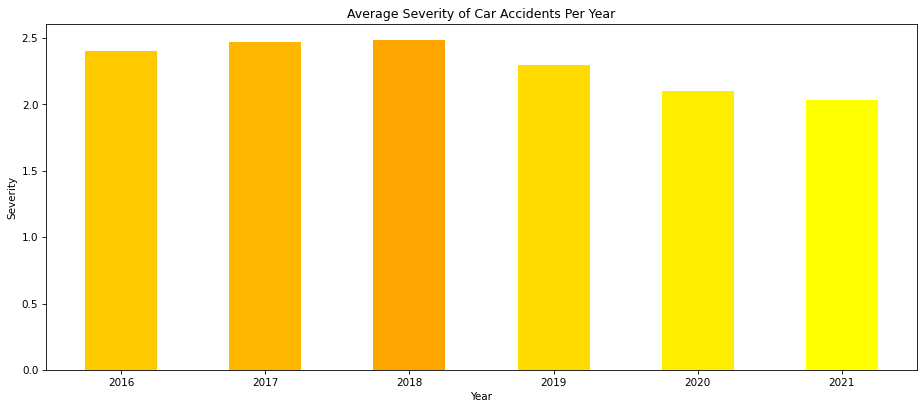

In [32]:
data['Year'] = data['Start_Time'].apply(lambda x: x.year) # A new column with the year of the accident

# Group by the year and find the mean of Severity
grouped_by_year = data.groupby(by='Year')
severities = grouped_by_year.apply(lambda x: x['Severity'].mean())

# Plot the bar chart
plt.bar(height=severities, x=severities.index, width=0.5, color=gen_colors(severities, "yellow", "orange"))
plt.xticks(range(2016, 2022))
plt.title('Average Severity of Car Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.show()

It seems like accident severity has been tending down over the last four years. There may be no significant reason for this, but one possibility is that there were less cars on the road over the COVID-19 time period.

## Graphing Accident Weather
We have a lot of columns related to weather. We proceed by making some graphs based on the weather conditions during accidents.

### Most Common Weather Conditions
First we consider the `Weather_Condition` column. We can take a look at the different values in this column.

In [33]:
data['Weather_Condition'].value_counts().to_csv('weather_conditions.csv') # Open weather_conditions.csv to look for yourself
print(f"There are {len(data['Weather_Condition'].unique())} different weather condition descriptions!")

There are 128 different weather condition descriptions!


There are quite a lot of different values to analyze. Let's take a look at the top 6 most common conditions and compare the number of accidents for each of them using a [stacked bar chart](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html).

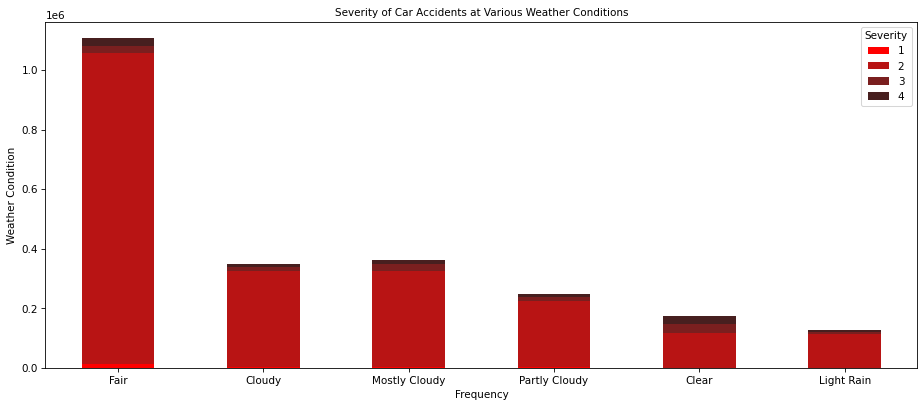

In [39]:
data.groupby(['Weather_Condition', 'Severity']).size().unstack().sort_values(
    by=2, ascending=False)[:6].plot(kind='bar', stacked=True, xlabel='Frequency', ylabel='Weather Condition', color=gen_colors(range(6), "red", "black"))
plt.xticks(rotation = 0)
plt.title('Severity of Car Accidents at Various Weather Conditions', fontsize=10)
plt.show()

This isn't really helpful to look at, so we can try to analyze the data over all the weather conditions. 

### Generalizing Weather Conditions
If we take a closer look at the weather conditions, some of them are very similar to each other (for example "Thunder" and "T-Storm"). In order to generalize all of these weather conditions, we make broader categories for some of these weather conditions. An alternative could have been to just use the top 6 weather conditions and drop any rows with any other wording, however we would lose a nontrivial amount of data that we can easily classify into a few categories. The categories we chose are
- Snow (Anything related to snow, winter, freezing, hail, or ice)
- Rain (Anything related to rain, drizzle, thunder, storm, or precipitation)
- Cloudy (Anything related to cloud or overcast)
- Clear (Anything related to clear or fair)

Note that this does not cover the weather conditions that have something to do with visibility (for example "Haze", "Fog", "Smoke"). This is because adding the extra column may add some unwanted colinearity between this column and some others. More specifically, a "0" entry in the four other entries already implies the weather was "Haze," "Fog," or something similar, so it would be unnecessary to add this extra column. Also, there is already a column for visibility in our data, so adding this column wouldn't really give us any better information than the visibility column would.

In [40]:
# this function will take an entry from the "Weather_Condition" column and keywords for one of the four weathers
# we chose to classify it by returning 1 if it should be considered as that type of weather and 0 if not
def classify_weather(weather, keywords):
    # check if the data is missing (nan)
    if type(weather) != str:
        return 0
    # check if any of the keywords are in the weather
    return int(any(x in weather for x in keywords))

# The list of weather options
# Feel free to edit this dict to add more options!
weathers =  {
            'Snow': ['Snow', 'Freez', 'Hail', 'Ice', 'Wint'],
            'Rain': ['Rain', 'Drizzle', 'Thunder', 'Storm', 'Precipitation'],
            'Cloudy': ['Cloud', 'Overcast'],
            'Clear': ['Clear', 'Fair']
            }

# Make a new column for each weather option by calling our classify_weather function and weathers dict
for key, value in weathers.items():
    data[key] = data['Weather_Condition'].apply(lambda x: classify_weather(x, value))

Now we compare the severity of accidents based on the selected weather conditions.

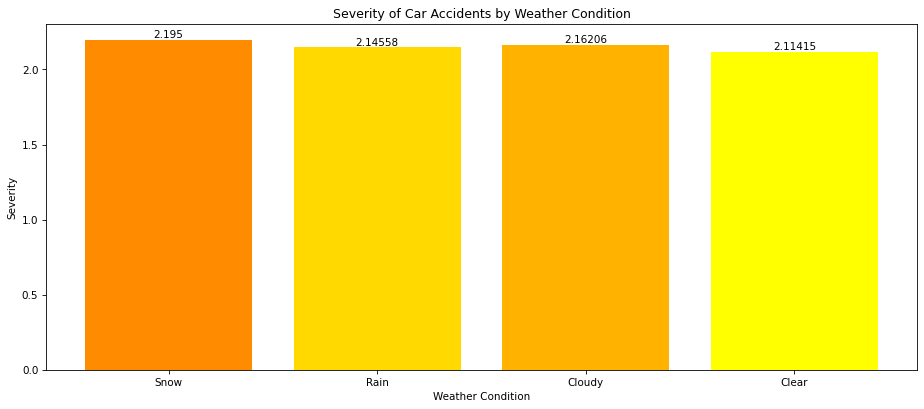

In [41]:
# Take the mean for each weather option
weather_severity = pd.Series([data[data[x] == 1]['Severity'].mean() for x in weathers.keys()])

# Plot the graph
fix, ax = plt.subplots()
bars = ax.bar(weathers.keys(), weather_severity, color=gen_colors(weather_severity, "yellow", "darkorange"))
ax.bar_label(bars)
plt.title("Severity of Car Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Severity")
plt.show()

From this bar chart it is not very clear what the difference in weathers really is in terms of accident severity. We can tell that snowy accidents are probably more severe than clear ones, but it's not clear if this is statistically significant. However, since we are dealing with over a million data points, the small differences might add up. We can do do [normalization with z-scores](https://developers.google.com/machine-learning/data-prep/transform/normalization#z-score) to make these differences clearer.

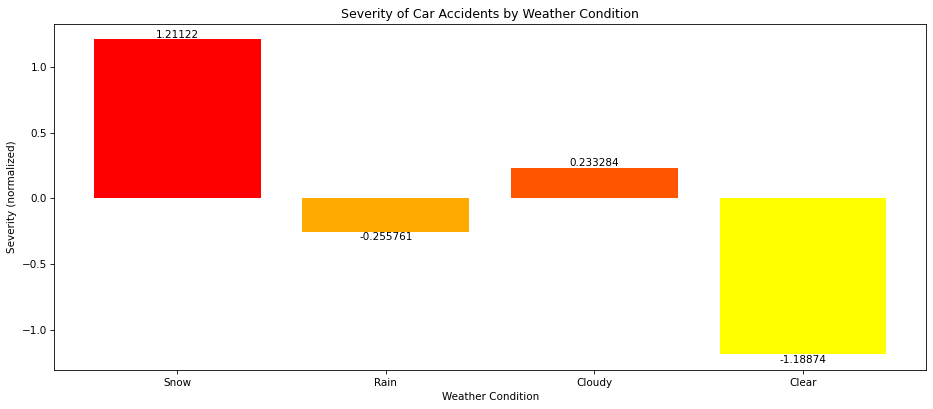

In [42]:
fix, ax = plt.subplots()

# Normalize our data
# Calculate z-score for every point
normalized_severities = (weather_severity - weather_severity.mean())/weather_severity.std()

# Plot the normalized graph
bars = ax.bar(weathers.keys(), normalized_severities, color=gen_colors(normalized_severities, "yellow", "red"))
ax.bar_label(bars)
plt.title("Severity of Car Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Severity (normalized)")
plt.show()

Now we can see a clear difference in the severity. When the weather is clear, accidents are on average less severe than on days with rain or snow.

# Part 4: Building a Machine Learning Model
Our goal in this section is to train a model that predicts the severity of an accident. From the previous sections, we can see that weather, time, and location may affect the severity of accidents. Our model should use elements such as weather, temperature, location and time to make predictions on the accident severity.

## Setting up Data for Machine Learning
Let's take a look at the current state of our data.

In [48]:
data.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Day,Hour,Year,Snow,Rain,Cloudy,Clear
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,OH,42.1,36.1,58.0,...,False,False,False,0,0,2016,0,1,0,0
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,OH,36.9,NaN,91.0,...,False,False,False,0,5,2016,0,1,0,0
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,OH,36.0,NaN,97.0,...,False,False,False,0,6,2016,0,0,1,0
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,OH,39.0,NaN,55.0,...,False,False,False,0,6,2016,0,0,1,0
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,OH,37.0,29.8,93.0,...,False,False,False,0,7,2016,0,1,0,0


There are two main issues with using this dataframe for machine learning.
- Unusuable data types such as datetimes, strings, and booleans
- Not a Number (NaN) values

We attempt to deal with these issues individually.

### One Hot Encoding
By default, machine learning models like to operate on numbers. So state abbreviations like "OH" and datetimes for the start of an accident will cause issues when attempting to train a model. To resolve this, we apply a technique called [One Hot Encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). This turns our categorical data into a numerical form by creating a column for each category. Pandas supplies us with another handy function called [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) that does this process for us.

While one hot encoding is very useful, it has some drawbacks. If we have a large amount of different categories (for example like we saw for `Weather_Condition`) we generate a similarly large amount of new columns. A large amount of columns is not useful for the machine learning training. To mitigate this, we simply remove the `Start_Time`, `End_Time` and `Weather_Condition` Columns (We captured the weather condition with the 4 weather categories defined in the previous section, and using the date of an accident in the past is not very useful for predicting the severity of accidents on future dates).

In [43]:
# Do one hot encoding
data = pd.get_dummies(data.drop(["Start_Time", "End_Time", "Weather_Condition"], axis=1, errors='ignore'))
data.head()

: 

: 

### Dealing with NaNs
Let's see which columns have NaN values and how many they have.

In [53]:
data.isna().sum()

Severity                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Temperature(F)               30
Wind_Chill(F)              4412
Humidity(%)                  34
Pressure(in)                 19
Visibility(mi)               56
Wind_Speed(mph)             605
Precipitation(in)          4633
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Day                           0
Hour                          0
Year                          0
Snow                          0
Rain                          0
Cloudy                        0
Clear                         0
State_CA

There are [several ways](https://medium.com/@andykashyap/5-simple-ways-to-deal-with-nan-in-your-data-c064289b6112) to deal with NaN values. The method chosen varies between data sets and the desired end goal. Let's see the best option in our case for each of the columns with NaN values.
- Precipitation(in): If there is an NaN in this series, we replace the value with 0. If there was no value reported then there was no rain.
- Wind_Chill(F): This column contains many NaN values, but there isn't a "default" value like with precipitation. So we chose to drop this column since the data inside cannot be very useful
- All other columns: Since all other columns only have a relatively small fraction of their data as NaN, we choose to set the NaN values to the average of the other values. It turns out this strategy is pretty effective if we only affect a small portion of the data.

In [55]:
data = data.drop('Wind_Chill(F)') # Remove this column
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(0) # Fill NaN values with 0
data = data.fillna(data.mean()) # Fill NaN columns with the mean
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West
0,3,40.108910,-83.092860,3.230,42.1,36.100000,58.0,29.76,10.0,10.40000,...,0,0,0,1,0,0,0,0,0,0
1,2,39.865420,-84.062800,0.747,36.9,23.330272,91.0,29.68,10.0,10.31479,...,0,0,0,0,0,0,0,0,0,0
2,2,39.102660,-84.524680,0.055,36.0,23.330272,97.0,29.70,10.0,10.31479,...,0,0,0,0,0,0,0,0,0,0
3,2,41.062130,-81.537840,0.123,39.0,23.330272,55.0,29.65,10.0,10.31479,...,0,0,0,0,0,0,0,0,0,0
4,3,39.172393,-84.492792,0.500,37.0,29.800000,93.0,29.69,10.0,10.40000,...,0,0,0,0,0,0,0,0,1,0


Now our data is ready for machine learning.

## Training and Testing a Machine Learning Model
Our first step will be to choose the type of model we want to train.

### Choosing a Machine Learning Model
There are many types of machine learning models, each excelling at their own tasks. Our task is classification: Given some data about an accident we want to classify the severity of the accident as 1, 2, 3, or 4. We chose the [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) model for this task, since they are good for classification problems and allow us to see which variables affect the output.

### Training the Model
The training and evaluation of our model is done using sklearn. Sklearn supports numerous different machine learning models, including the decision tree classifier. The Decision Tree link above goes into detail about the functionality.

In [56]:
X = data.drop(['Severity'], axis=1) # The data to train on, we ask the model to classify a car accident given this information
y = data['Severity'] # The "answer" to the classification

# Create and train the decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=7).fit(X, y)

A decision tree can also be [displayed](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) with sklearn. Let's see which decisions are the most important by displaying the top few layers.

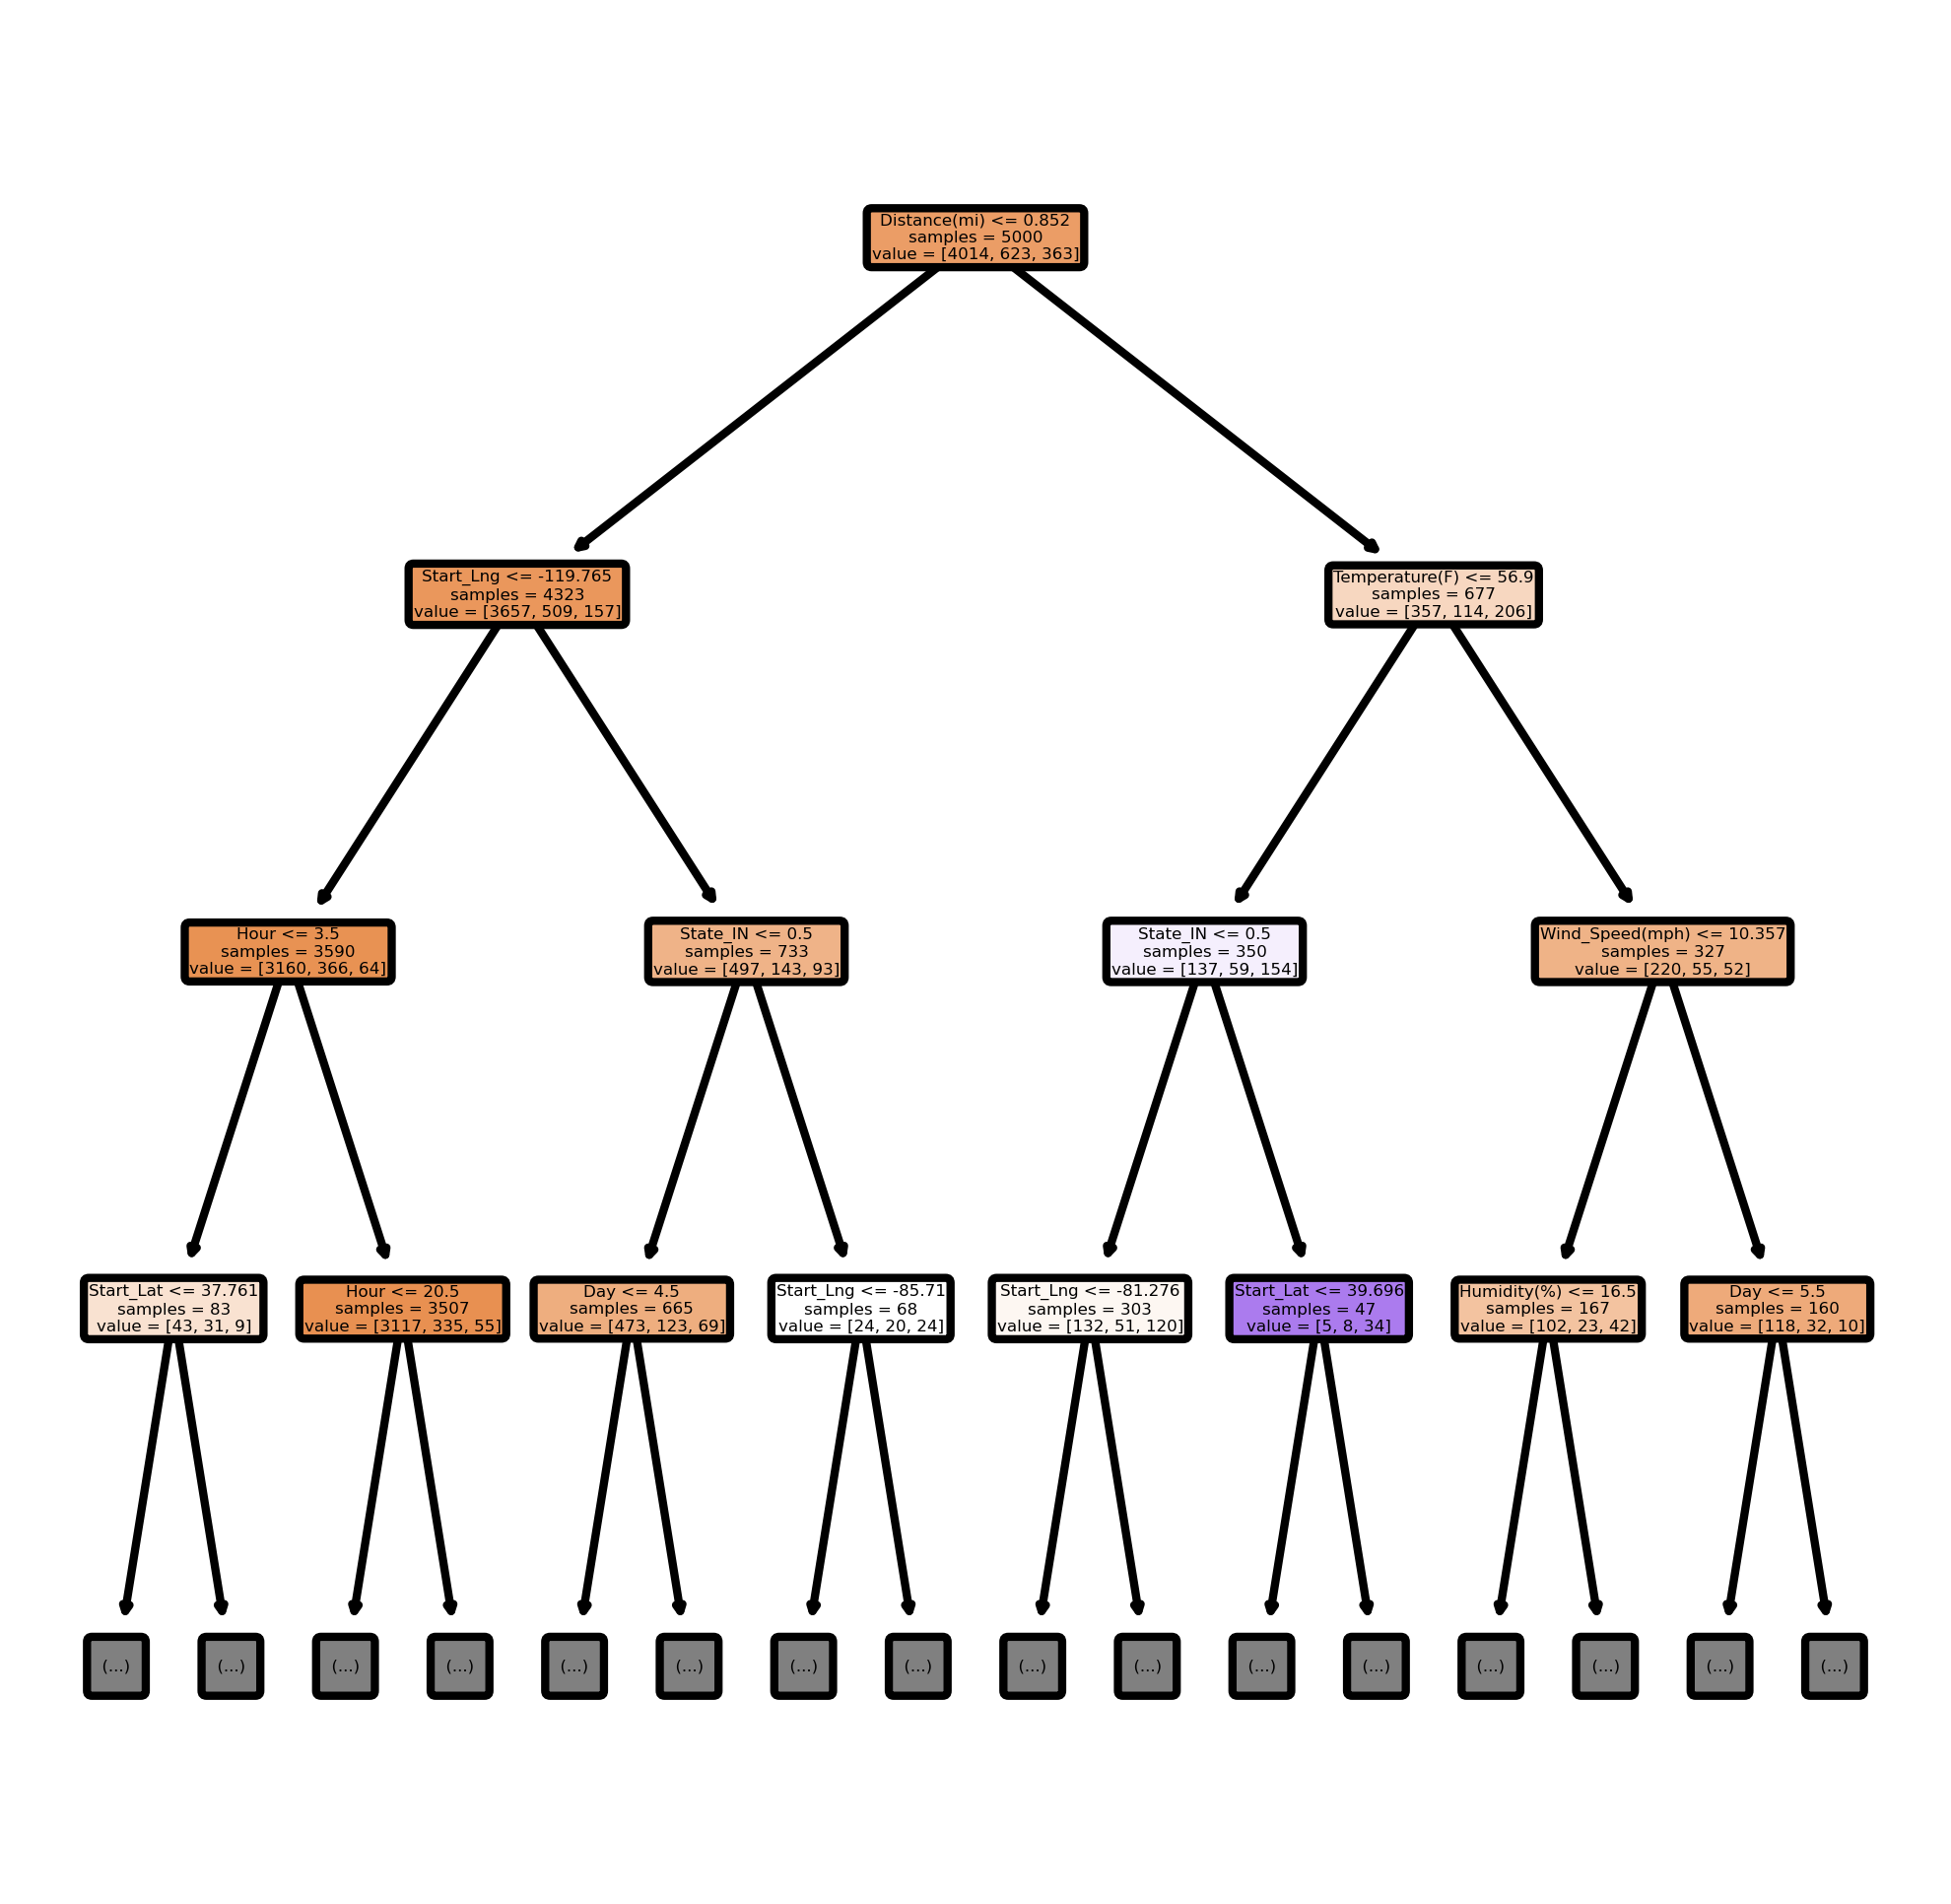

In [57]:
# Display the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(decision_tree,
           feature_names = list(X.columns),
           filled = True,
           max_depth=3,
           fontsize=2,
           rounded=True,
           impurity=False);

**ADD DISCUSSION OF TREE HERE**

### Cross Validation

In [58]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.244, 0.608, 0.81 , 0.782, 0.816, 0.788, 0.8  , 0.768, 0.79 ,
       0.798])

# Citations
- <a id="1">[1]</a> 
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
- <a id="2">[2]</a> 
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.